In [28]:
#!pip install gradio

Importing The necessary Libraries

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Loading The Dataset

In [30]:

wine_ds=pd.read_csv("redAndWhite.csv")

#Checking shape and description of the dataset
print('No of rows and columns:',wine_ds.shape)
wine_ds.describe()

No of rows and columns: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [31]:
#checking the data 
wine_ds.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2401,white,9.2,0.16,0.49,2.00,0.044,18.0,107.0,0.99514,3.10,0.53,10.200000,4
3619,white,6.8,0.45,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.600000,6
2332,white,6.3,0.40,0.32,10.60,0.049,38.0,209.0,0.99810,3.47,0.59,9.300000,6
5794,red,8.3,0.31,0.39,2.40,0.078,17.0,43.0,0.99444,3.31,0.77,12.500000,7
4319,white,6.7,0.41,0.24,5.40,0.035,33.0,115.0,0.99010,3.12,0.44,12.893333,7


In [32]:
#convert the type column to binary
wine_ds['type'] = wine_ds['type'].map({'red': 0, 'white': 1})

In [33]:
#checking the skewness of the dataset
print(wine_ds.skew().sort_values(ascending=False)) 

chlorides               5.399828
sulphates               1.797270
fixed acidity           1.723290
volatile acidity        1.495097
residual sugar          1.435404
free sulfur dioxide     1.220066
alcohol                 0.565718
density                 0.503602
citric acid             0.471731
pH                      0.386839
quality                 0.189623
total sulfur dioxide   -0.001177
type                   -1.179095
dtype: float64


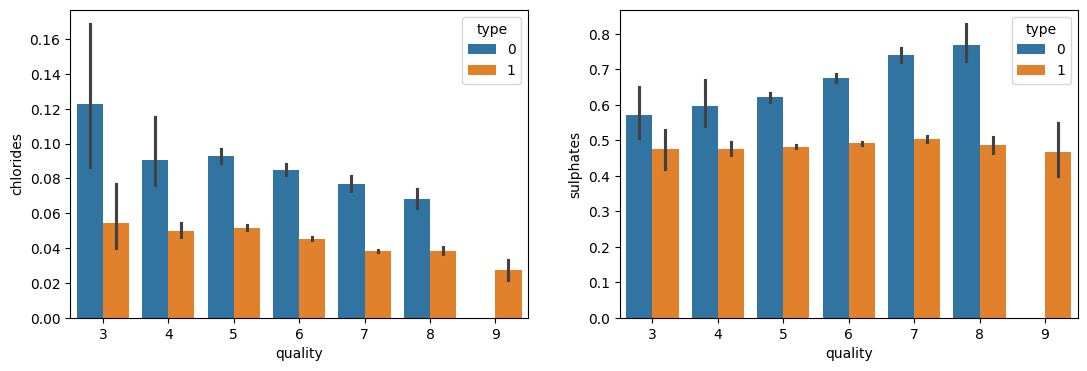

In [34]:
#ploting the barplot for skewed data vs quality
fig, axs = plt.subplots(1, 2, figsize=(13, 4))  # figsize can be adjusted as needed

sns.barplot(x='quality' ,y='chlorides' , data=wine_ds ,hue='type',ax=axs[0])
sns.barplot(x='quality' ,y='sulphates' , data=wine_ds ,hue='type', ax=axs[1])
plt.show()

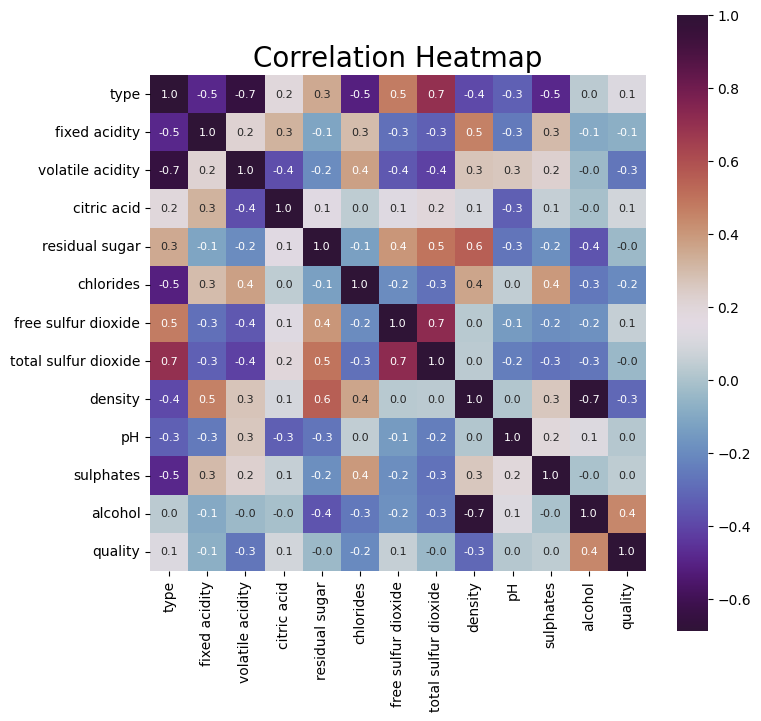

In [35]:
correlation =wine_ds.corr()
#constructing a heatmap to understand the correlation b/w the columns
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True , fmt='.1f' , annot=True , annot_kws={'size':8}, cmap='twilight_shifted')
plt.title("Correlation Heatmap", fontsize=20)
plt.show()


In [36]:
#converting the type column to numerical values
#wine_ds['type'] = wine_ds['type'].map({'red': 0, 'white': 1})

wine_ds.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2526,1,6.5,0.18,0.33,1.4,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,7
400,1,6.3,0.20,0.40,1.5,0.037,35.0,107.0,0.99170,3.46,0.50,11.4,6
6328,0,7.4,0.41,0.24,1.8,0.066,18.0,47.0,0.99560,3.37,0.62,10.4,5
5095,0,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.1,6
1920,1,8.1,0.26,0.33,11.1,0.052,52.5,158.0,0.99760,3.03,0.49,10.2,7


In [37]:
#defining a function to identify  outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]

    return ls


#identifying the outliers in dataset and storing the index of the outliers in index_list
#using only chlorides and sulphates for outlier removal as they have the highest skewness
index_list=[]
for feature in ['chlorides','sulphates']:
    index_list.extend(outliers(wine_ds, feature))

print(index_list[:5])



[40, 41, 54, 194, 195]


In [38]:
#defining a remove_outliers function to remove the outliers by index_list .
def remove_outliers(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

new_df=remove_outliers(wine_ds,index_list)

In [39]:
#removing the outliers from the dataset and storing the new dataset in new_df

print('Shape of the dataset after removing outliers:',new_df.shape)
new_df.sample(5)

Shape of the dataset after removing outliers: (6070, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4164,1,7.0,0.31,0.35,1.6,0.063,13.0,119.0,0.99184,3.22,0.50,10.7,5
744,1,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,5
4458,1,6.6,0.35,0.26,2.7,0.045,19.0,129.0,0.98952,3.24,0.48,13.0,7
4964,0,7.5,0.52,0.11,1.5,0.079,11.0,39.0,0.99680,3.42,0.58,9.6,5
4510,1,6.8,0.33,0.30,2.1,0.047,35.0,147.0,0.98860,3.24,0.56,13.4,6


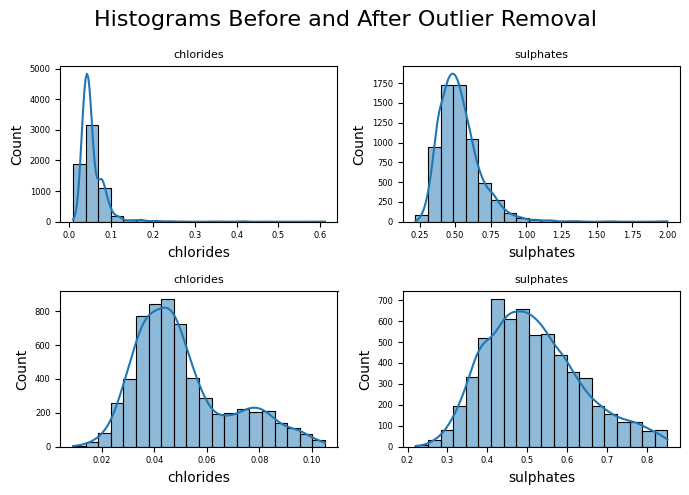

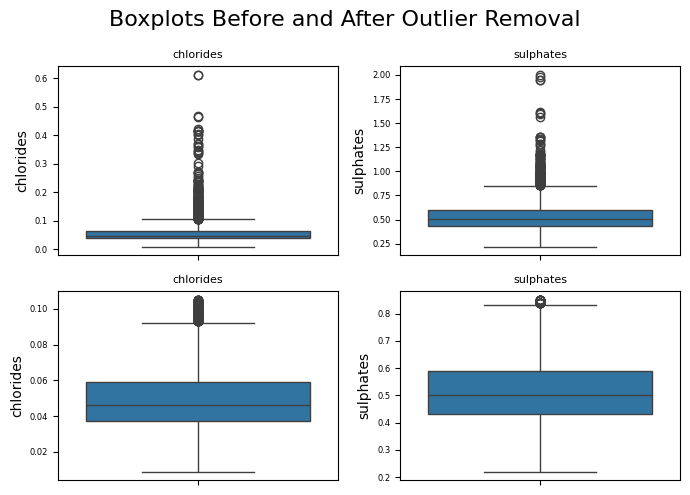

In [40]:
#making histograms and boxplots to compare the dataset before and after outlier removal

columns = ['chlorides','sulphates']


fig, axes = plt.subplots(2, 2, figsize=(7, 5)) 
fig.suptitle("Histograms Before and After Outlier Removal", fontsize=16)
for i, col in enumerate(columns):

    sns.histplot(wine_ds[col], bins=20, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'{col}', fontsize=8)
    axes[0, i].tick_params(axis='both', labelsize=6)

    sns.histplot(new_df[col], bins=20, kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'{col}', fontsize=8, )
    axes[1, i].tick_params(axis='both', labelsize=6)

fig.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(7, 5)) 
fig.suptitle("Boxplots Before and After Outlier Removal", fontsize=16)

for i, col in enumerate(columns):
   
    sns.boxplot(y=wine_ds[col], ax=axes[0, i])
    axes[0, i].set_title(f'{col}', fontsize=8)
    axes[0, i].tick_params(axis='both', labelsize=6)

    sns.boxplot(y=new_df[col], ax=axes[1, i])
    axes[1, i].set_title(f'{col}', fontsize=8)
    axes[1, i].tick_params(axis='both', labelsize=6)

fig.tight_layout()
plt.show()

In [41]:
#resetting the index of the dataset
wine_ds = wine_ds.reset_index(drop=True)
new_df = new_df.reset_index(drop=True)


new_df.sample(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2287,1,8.9,0.21,0.37,1.2,0.028,20.0,93.0,0.99244,3.20,0.37,11.5,5
1037,1,8.3,0.22,0.38,14.8,0.054,32.0,126.0,1.00020,3.22,0.50,9.7,5
1045,1,6.3,0.34,0.29,6.2,0.046,29.0,227.0,0.99520,3.29,0.53,10.1,6


In [42]:
#making data ready for training and converting it to numpy arrays 
X=new_df.drop('quality',axis=1).to_numpy()
Y=new_df['quality'].to_numpy()

#splitting the data into training and testing data
X_train , X_test , Y_train ,Y_test= train_test_split(X , Y , test_size=0.25 , random_state=49)

In [43]:
#checking the shape of the data
print(Y.shape , Y_train.shape, Y_test.shape)


(6070,) (4552,) (1518,)


In [44]:
#training the model
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [45]:
#checking the accuracy of the model
X_test_preedection=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_preedection,Y_test)
print('accuracy :', test_data_accuracy)

accuracy : 0.6897233201581028


In [46]:
#checking the accuracy of the model using the test data

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred , average='macro' , zero_division=0 )
recall = recall_score(Y_test, Y_pred , average='weighted' )
f1 = f1_score(Y_test, Y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.69
Precision: 0.55
Recall: 0.69
F1-score: 0.68


In [47]:
#checking the feature importance of the model
model.feature_importances_

array([0.00302255, 0.07497349, 0.09993004, 0.07959578, 0.08272185,
       0.08943047, 0.08598851, 0.09072187, 0.103082  , 0.08274758,
       0.08739326, 0.12039259])

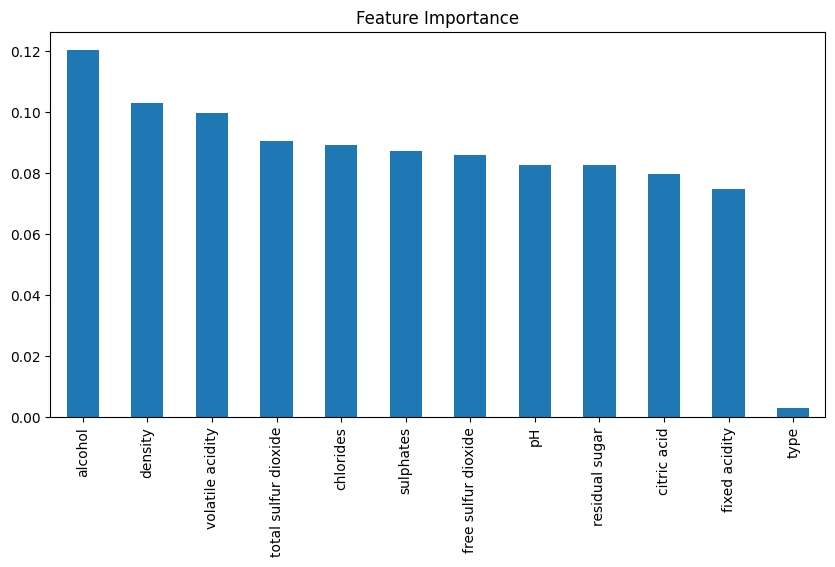

In [48]:
# making feature importance plot
pd.Series(model.feature_importances_, index=new_df.drop('quality',axis=1).columns).sort_values(ascending=False).plot(kind='bar', figsize=(10, 5)) 
plt.title('Feature Importance')
plt.show()

In [49]:
#predicting the quality of the wine
input_data=(1,5.9,0.29,0.25,12.0,0.057,48.0,224.0,0.9981,3.23,0.41,9.0)
#changing the input data in numpy array
input_data_as_nparray=np.asarray(input_data)
#reshaping the data as we are predecting for only one value
input_data_reshape=input_data_as_nparray.reshape(1,-1)

predection=model.predict(input_data_reshape)
prediction = model.predict(input_data_reshape)
if prediction[0] < 7:
    pred = 'wine quality is bad'
else:
    pred = 'wine quality is good'

print(pred)
print('precicted quality :',predection[0] )

wine quality is bad
precicted quality : 6


Making A Gradio Interface

  It can be acessed using this link : https://huggingface.co/spaces/MohdNasir/wine_quality

In [51]:
# Preloaded mean values for each feature in an array
import gradio as gr
default_values_array = [0, 7.215307, 0.339666, 0.318633, 5.443235, 0.056034, 30.525319, 115.744574, 0.994697, 3.218501, 0.531268, 10.491801]

def predict_quality(type, fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                    chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
                    pH, sulphates, alcohol):
    type_value = 0 if type == "Red" else 1
    input_data = np.array([type_value, fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                           chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
                           pH, sulphates, alcohol]).reshape(1, -1)
    prediction = model.predict(input_data)[0]
    quality = "Wine Quality is Good" if prediction >= 7 else "Wine Quality is Bad"
    return quality, prediction

def predict_quality_array(input_array):
    try:
        input_data = np.array([float(x.strip()) for x in input_array.split(',')]).reshape(1, -1)
        if input_data.shape[1] != 12:
            return "Error: Input should contain exactly 12 values", None
        prediction = model.predict(input_data)[0]
        quality = "Wine Quality is Good" if prediction >= 7 else "Wine Quality is Bad"
        return quality, prediction
    except ValueError:
        return "Error: Invalid input. Please enter numeric values separated by commas.", None

with gr.Blocks() as interface:
    gr.Markdown("# Wine Quality Prediction")
    
    with gr.Tab("Individual Inputs"):
        type = gr.Radio(["Red", "White"], label="Type", value="Red" if default_values_array[0] == 0 else "White")
        fixed_acidity = gr.Number(label="Fixed Acidity", value=default_values_array[1])
        volatile_acidity = gr.Number(label="Volatile Acidity", value=default_values_array[2])
        citric_acid = gr.Number(label="Citric Acid", value=default_values_array[3])
        residual_sugar = gr.Number(label="Residual Sugar", value=default_values_array[4])
        chlorides = gr.Number(label="Chlorides", value=default_values_array[5])
        free_sulfur_dioxide = gr.Number(label="Free Sulfur Dioxide", value=default_values_array[6])
        total_sulfur_dioxide = gr.Number(label="Total Sulfur Dioxide", value=default_values_array[7])
        density = gr.Number(label="Density", value=default_values_array[8])
        pH = gr.Number(label="pH", value=default_values_array[9])
        sulphates = gr.Number(label="Sulphates", value=default_values_array[10])
        alcohol = gr.Number(label="Alcohol", value=default_values_array[11])
        
        predict_button = gr.Button("Predict")
        
        quality_output = gr.Textbox(label="Wine Quality")
        prediction_output = gr.Number(label="Predicted Value")
        
        predict_button.click(
            predict_quality,
            inputs=[type, fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                    chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
                    pH, sulphates, alcohol],
            outputs=[quality_output, prediction_output]
        )
    
    with gr.Tab("Array Input"):
        array_input = gr.Textbox(
            label="Input Array",
            placeholder="Enter 12 comma-separated values: type (0 for Red, 1 for White), fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol"
        )
        array_predict_button = gr.Button("Predict")
        
        array_quality_output = gr.Textbox(label="Wine Quality")
        array_prediction_output = gr.Number(label="Predicted Value")
        
        array_predict_button.click(
            predict_quality_array,
            inputs=array_input,
            outputs=[array_quality_output, array_prediction_output]
        )

interface.launch()

Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.
